In [1]:
from jarvis.db.figshare import data
from jarvis.core.atoms import Atoms, ase_to_atoms, get_supercell_dims
from jarvis.core.atoms import crop_square
from jarvis.analysis.stem.convolution_apprx import STEMConv
import matplotlib.pyplot as plt

# Example of using STEMConv to simulate a surface image from a 2D DFT structure
dft_2d = data('dft_2d')


Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815705
Loading the zipfile...
Loading completed.


In [2]:
data = dft_2d[10]
data

{'jid': 'JVASP-676',
 'spg_number': '11',
 'spg_symbol': 'P2_1/m',
 'formula': 'Te2Mo',
 'formation_energy_peratom': -0.14204,
 'func': 'OptB88vdW',
 'optb88vdw_bandgap': 0.0,
 'atoms': {'lattice_mat': [[3.4778329262343175, 0.0, 0.0],
   [0.0, 6.358483588462181, 0.0],
   [0.0, 0.0, 33.313518]],
  'coords': [[0.0, 5.4806251804122335, 8.831885238081494],
   [1.738915, 2.252532590805098, 8.25184283171178],
   [1.738915, 4.474489628624973, 4.682134709348086],
   [0.0, 1.3440620146276585, 5.262177931699691],
   [0.0, 3.828553699368643, 6.6607441192869485],
   [1.738915, 6.126528767761345, 6.853535815232071]],
  'elements': ['Te', 'Te', 'Te', 'Te', 'Mo', 'Mo'],
  'abc': [3.47783, 6.35848, 33.31352],
  'angles': [90.0, 90.0, 90.0],
  'cartesian': True,
  'props': ['', '', '', '', '', '']},
 'slme': 'na',
 'magmom_oszicar': 0.004,
 'spillage': 'na',
 'elastic_tensor': 'na',
 'effective_masses_300K': {'p': [0.0, 0.0, 0.01], 'n': [0.0, 0.0, 0.01]},
 'kpoint_length_unit': 75,
 'maxdiff_mesh': 'na

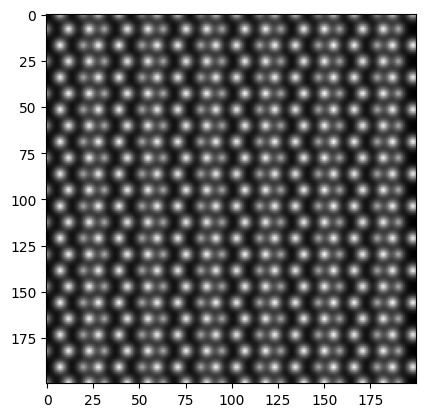

In [ ]:
a = Atoms.from_dict(data["atoms"])
dims = get_supercell_dims(atoms=a, enforce_c_size=50)
s = a.make_supercell_matrix(dims)
c = crop_square(s, csize=50)
p = STEMConv(output_size=[200, 200]).simulate_surface(atoms=c)[0]

In [4]:
p

array([[ 23.72520083,  43.47068372,  85.73236484, ..., 647.68053573,
        742.02784289, 617.57511574],
       [ 27.65393273,  43.87765637,  79.06129167, ..., 523.2497943 ,
        573.35266249, 502.33578824],
       [ 38.30755677,  48.03458455,  70.71466068, ..., 368.687228  ,
        394.57357695, 354.12645053],
       ...,
       [262.9914573 , 217.67142902, 160.41510149, ...,  45.69832779,
         43.11350921,  38.52590567],
       [373.13799882, 297.94174147, 210.55766584, ...,  28.94553266,
         23.82846805,  20.44260635],
       [463.65085707, 354.75300206, 244.13333233, ...,  22.36759326,
         15.94548871,  12.9283849 ]])

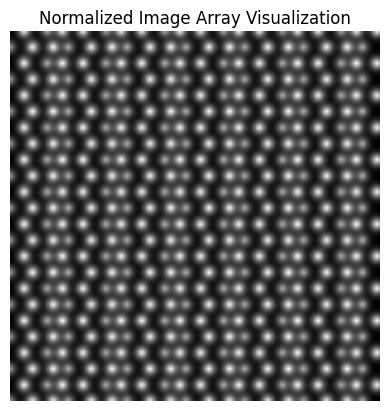

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize the image array to [0, 1] for display
img_norm = (p - np.min(p)) / (np.max(p) - np.min(p))

plt.imshow(img_norm, cmap='gray')
plt.title('Normalized Image Array Visualization')
plt.axis('off')
plt.show()

In [7]:
image


NameError: name 'image' is not defined